In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem

/home/alex/NuMI/PELEE/


In [58]:
nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")

nue_nue_vars_tot = defaultdict(list)
nue_nue_weights_tot = defaultdict(list)


nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
nue_nue_vars_tot.pop("Unnamed: 0")
nue_nue_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot.keys():
    if len(nue_nue_weights_tot[c][0]) > 2:
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
        nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot.keys():
    if len(nue_nue_vars_tot[c][0]) > 2:
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
        nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)
    
###############################################################

nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_mc_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_mc_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_vars_tot = defaultdict(list)
nue_mc_weights_tot = defaultdict(list)


nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
nue_mc_vars_tot.pop("Unnamed: 0")
nue_mc_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot.keys():
    if len(nue_mc_weights_tot[c][0]) > 2:
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
        nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
        nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot.keys():
    if len(nue_mc_vars_tot[c][0]) > 2:
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
        nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
        nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot.pop(i)
    nue_mc_weights_tot.pop(i)
    
###############################################################

nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection.csv")
#nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")

nue_dirt_vars_tot = defaultdict(list)
nue_dirt_weights_tot = defaultdict(list)


nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
nue_dirt_vars_tot.pop("Unnamed: 0")
nue_dirt_weights_tot.pop("Unnamed: 0")

#print(nue_dirt_vars_tot[c][0])

poplist = []

for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_weights_tot[c][0]) > 2:
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
        nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
        nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot.keys():
    if len(nue_dirt_vars_tot[c][0]) > 2:
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
        nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
        nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot.pop(i)
    nue_dirt_weights_tot.pop(i)
    
print(nue_dirt_vars_tot)
    
###############################################################

nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection.csv")
#nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_ext_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_ext_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")


nue_ext_vars_tot = defaultdict(list)
nue_ext_weights_tot = defaultdict(list)


nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
nue_ext_vars_tot.pop("Unnamed: 0")
nue_ext_weights_tot.pop("Unnamed: 0")

#print(nue_ext_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection.csv")
#nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_redo.csv")
#nue_data_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")
#nue_data_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")


nue_data_vars_tot = defaultdict(list)
nue_data_weights_tot = defaultdict(list)


nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
nue_data_vars_tot.pop("Unnamed: 0")
nue_data_weights_tot.pop("Unnamed: 0")

print(nue_data_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_mc_vars_tot = defaultdict(list)
numu_mc_weights_tot = defaultdict(list)


numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
numu_mc_vars_tot.pop("Unnamed: 0")
numu_mc_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot.keys():
    if len(numu_mc_weights_tot[c][0]) > 2:
        numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
        numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
        numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot.keys():
    if len(numu_mc_vars_tot[c][0]) > 2:
        numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
        numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
        numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot.pop(i)
    numu_mc_weights_tot.pop(i)
    
###############################################################

numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_dirt_vars_tot = defaultdict(list)
numu_dirt_weights_tot = defaultdict(list)


numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
numu_dirt_vars_tot.pop("Unnamed: 0")
numu_dirt_weights_tot.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_weights_tot[c][0]) > 2:
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
        numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
        numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot.keys():
    if len(numu_dirt_vars_tot[c][0]) > 2:
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
        numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
        numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot.pop(i)
    numu_dirt_weights_tot.pop(i) 
    
###############################################################

numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_ext_vars_tot = defaultdict(list)
numu_ext_weights_tot = defaultdict(list)

numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
numu_ext_vars_tot.pop("Unnamed: 0")
numu_ext_weights_tot.pop("Unnamed: 0")

    
###############################################################

numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_data_vars_tot = defaultdict(list)
numu_data_weights_tot = defaultdict(list)


numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
numu_data_vars_tot.pop("Unnamed: 0")
numu_data_weights_tot.pop("Unnamed: 0")

print(numu_data_vars_tot)

{'4': {0: [0.25621253]}}
{'0': {0: 21, 1: 26, 2: 7, 3: 4, 4: 2, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}}
{'0': {0: 820, 1: 1053, 2: 380, 3: 117, 4: 39, 5: 13, 6: 4, 7: 2, 8: 5, 9: 0}}


In [59]:
import csv

#with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
#with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_stat_errs = list(csv_reader)

for a in range(len(nue_nue_stat_errs)):
    nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])
    
print("nue_nue_stat_errs = ", nue_nue_stat_errs)

with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_stat_errs_selected = list(csv_reader)

for a in range(len(nue_nue_stat_errs_selected)):
    nue_nue_stat_errs_selected[a] = float(nue_nue_stat_errs_selected[a][0])
    
print("nue_nue_stat_errs_selected = ", nue_nue_stat_errs_selected)
print("")

################################################

#with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs = list(csv_reader)

for a in range(len(nue_mc_stat_errs)):
    nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])
    
print("nue_mc_stat_errs = ", nue_mc_stat_errs)

#with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_stat_errs_selected = list(csv_reader)

for a in range(len(nue_mc_stat_errs_selected)):
    nue_mc_stat_errs_selected[a] = float(nue_mc_stat_errs_selected[a][0])
    
print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

print("")

###################################################

with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs = list(csv_reader)

for a in range(len(nue_dirt_stat_errs)):
    nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])
    
print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(nue_dirt_stat_errs_selected)):
    nue_dirt_stat_errs_selected[a] = float(nue_dirt_stat_errs_selected[a][0])
    
print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

print("")

################################################

with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_stat_errs = list(csv_reader)

for a in range(len(numu_mc_stat_errs)):
    numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])
    
print("numu_mc_stat_errs = ", numu_mc_stat_errs)

with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_stat_errs_selected = list(csv_reader)

for a in range(len(numu_mc_stat_errs_selected)):
    numu_mc_stat_errs_selected[a] = float(numu_mc_stat_errs_selected[a][0])
    
print("numu_mc_stat_errs_selected = ", numu_mc_stat_errs_selected)

print("")

###################################################

with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs = list(csv_reader)

for a in range(len(numu_dirt_stat_errs)):
    numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])
    
print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_dirt_stat_errs_selected = list(csv_reader)

for a in range(len(numu_dirt_stat_errs_selected)):
    numu_dirt_stat_errs_selected[a] = float(numu_dirt_stat_errs_selected[a][0])
    
print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)

nue_nue_stat_errs =  [0.08733020116125535, 0.25711142625289435, 0.09765425733092603, 0.02828508539635801, 0.010606907023634255, 0.003252784820581171, 0.0017678178372723756, 0.0009192652753816354, 0.00014142542698179005, 0.0002121381404726851]
nue_nue_stat_errs_selected =  [11.374820590019226, 35.03144288063049, 13.08959573507309, 3.53603458404541, 1.4140463322401047, 0.408662524074316, 0.20907571725547314, 0.11957629956305027, 0.020303319208323956, 0.02895230706781149]

nue_mc_stat_errs =  [0.2491150138577011, 0.22713427734084515, 0.0512883852059973, 0.014653824344570656, 0.007326912172285328, 0.0, 0.0, 0.0, 0.0, 0.0]
nue_mc_stat_errs_selected =  [3.060250983348908, 2.189676957204938, 0.6295416615903378, 0.11053932458162308, 0.05357301980257034, 0.0, 0.0, 0.0, 0.0, 0.0]

nue_dirt_stat_errs =  [0.002425186408299409, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
nue_dirt_stat_errs_selected =  [0.03001459501683712, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

numu_mc_stat_errs =  [52.9149

In [60]:
with open('nue_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_nodirt.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_detsys_errs = list(csv_reader)

for a in range(len(nue_detsys_errs)):
    nue_detsys_errs[a] = float(nue_detsys_errs[a][0])
    
print("nue_detsys_errs = ", nue_detsys_errs)

nue_detsys_errs =  [12.619991075132248, 15.542262420588214, 5.745895634776835, 1.0290307276363322, 0.19206488388745951, 0.04856135605364776, 0.45254246380161595, 0.004474062980693324, 0.002112060993989765, 0.005658283536510227]


In [61]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [62]:
import csv
import numpy as np

#############################
#### nue_nue ################
#############################
#with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_3GeV.csv', 'r') as read_obj:
with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_ppfx = list(csv_reader)   
    
with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_ppfx = list(csv_reader)


with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_genie = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_genie = list(csv_reader)

    
with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ns_geo = list(csv_reader)
    
with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_nue_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

###########################################################################################

#############################
#### nue_mc ################
#############################
#with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_ppfx = list(csv_reader)   
    
#with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_ppfx = list(csv_reader)


#with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_genie = list(csv_reader)
    
#with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_genie = list(csv_reader)

    
#with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_reint = list(csv_reader)
    #print(nue_nue_final_ns_reint)
    
#with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_reint = list(csv_reader)  
    #print(nue_nue_final_ncvs_reint)
    
    
#with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ns_geo = list(csv_reader)
    
#with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_first20.csv', 'r') as read_obj:
#with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv', 'r') as read_obj:
with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    nue_mc_final_ncvs_geo = list(csv_reader)    

    
    
cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

###########################################################################################

#############################
#### numu_mc ################
#############################
with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_ppfx = list(csv_reader)   
    
with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_ppfx = list(csv_reader)


with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_genie = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_genie = list(csv_reader)

    
with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_reint = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_reint = list(csv_reader)   
    
    
with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ns_geo = list(csv_reader)
    
with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_mc_final_ncvs_geo = list(csv_reader)    

    
    
cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)

In [63]:
############
### ppfx ###
############

#################################################

nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################
####from earlier typo
nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_ppfx = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_first20.csv")

nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_recoCut.csv")
#nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

#################################################

numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### genie ###
############

#################################################

nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### reint ###
############

#################################################

nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)


############
### geo ###
############

#################################################

nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut.csv")

nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_genie)


nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
#print(nue_nue_df_genie_vars)   


nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut.csv")
#nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
#print(nue_nue_df_genie_splines)

#################################################

numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
#print(nue_nue_df_ppfx)


numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
#print(nue_nue_df_ppfx_vars)   


numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection.csv")

numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
#print(nue_nue_df_ppfx_splines)

[1.46352388e+01 3.73751080e+01 1.37277557e+01 3.68510836e+00
 1.45922934e+00 4.08662548e-01 2.09075728e-01 1.19576309e-01
 2.03033201e-02 2.89523075e-02]


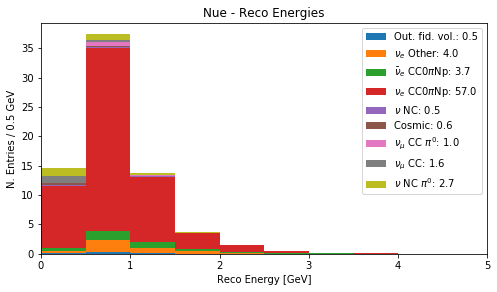

In [64]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_vars_tot.values())

i = 0
for c in nue_nue_vars_tot.keys():
    nue_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot.values())

i = 0
for c in nue_nue_weights_tot.keys():
    nue_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot, nue_mc_vars_tot, nue_dirt_vars_tot]
weightss = [nue_nue_weights_tot, nue_mc_weights_tot, nue_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])
"""
n_ext, ext_bins, patches = nue_ax1.hist(
            nue_ext_vars_tot[str(0)][0],
            weights=nue_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)
"""
nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_data_vars_tot[str(0)].values())
#print(type(nue_data_vars_tot[str(0)].values()))

"""
nue_ax1.errorbar(
            current_bincenters,
            nue_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")
"""
#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

In [65]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

#print("Rounding to 3dp")
#nue_wanted_list = np.array(nue_wanted_list)
#nue_wanted_list = np.round(nue_wanted_list, 3)
#print(nue_wanted_list)
#nue_wanted_list = list(nue_wanted_list)
#print(nue_wanted_list[0])

print('%.50f' % math.fsum(nue_wanted_list))

#nue_wanted_list = n_nue_tot
#print(nue_wanted_list)
print("")
print(sum(current_total_hist))
#print(sum(sum(n_nue_tot)))

print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

[0.0, 0.0, 0.020303320127453617, 0.0, 0.0, 0.0, 0.0, 0.0]

SUMS
[0.5189284452867611, 4.5427842674436105, 8.288840414744026, 65.3263513407041, 65.79928784005617, 66.36172904558734, 67.33121186020705, 68.98005997797912, 71.66901041086058]
[4.0238558221568494, 3.7460561473004157, 57.03751092596006, 0.47293649935207327, 0.5624412055311723, 0.9694828146197096, 1.6488481177720757, 2.6889504328814553]

Wanted List:
[10.449224075510086, 31.078248422265883, 11.142672530720944, 2.7208182211142926, 1.0626423368548643, 0.3260199520259164, 0.13695140632728453, 0.0804829838961254, 0.020303320127453617, 0.02014767711723664]

57.03751092596008476220958982594311237335205078125000

71.66901041086058
0.7958462185954325


Sidenote for unfolding

In [54]:
#Data values
data_values = list(nue_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = nue_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

#print(nue_wanted_list[1:7])

KeyError: '0'

802

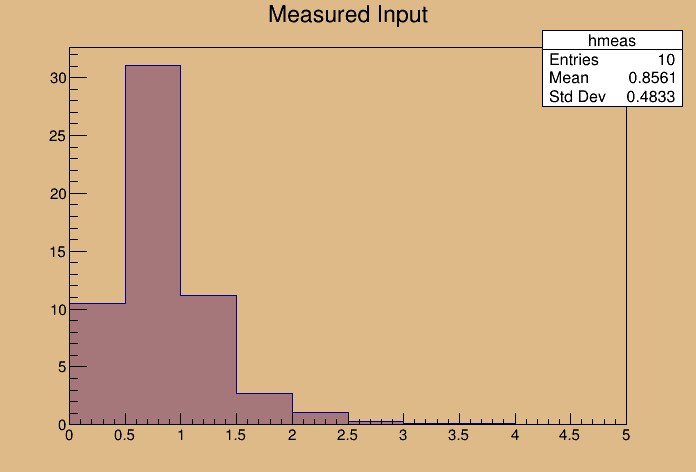

In [10]:
# Create a new canvas, and customize it.
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 42 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )

hfile = gROOT.FindObject( 'WSD_nue_energy_Flip.root' )
if hfile:
    hfile.Close()
hfile = TFile( 'WSD_nue_energy_Flip.root', 'UPDATE', 'Demo ROOT file with histograms' )

# Create some histograms, a profile histogram and an ntuple
hpx    = TH1F( 'hmeas', 'Measured Input', 10, 0, 5 )

# Set canvas/frame attributes.
hpx.SetFillColor( 48 )
gBenchmark.Start( 'hsimple' )
#gStyle.SetErrorX(0.0001)


for a in range(len(nue_wanted_list)):
    hpx.Fill(a/2 + 0.25, nue_wanted_list[a])

hpx.Draw("hist")
hpx.SetFillColor( 0 )
c1.Modified()
c1.Update() 
hpx.SetFillColor( 48 )
c1.Modified()
c1.Update()
c1.Draw()
hfile.Write()

In [55]:
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
#           data_signal,
#           delimiter =", ", 
#           fmt ='% s')
#---------------------------------------------------------------------------
np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_truthseltest.csv", 
           nue_wanted_list,
           delimiter =", ", 
           fmt ='% s')
#---------------------------------------------------------------------------
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
#           current_total_hist,
#           delimiter =", ", 
#           fmt ='% s')

## Now do Numu

dict_values([820, 1053, 380, 117, 39, 13, 4, 2, 5, 0])
<class 'dict_values'>


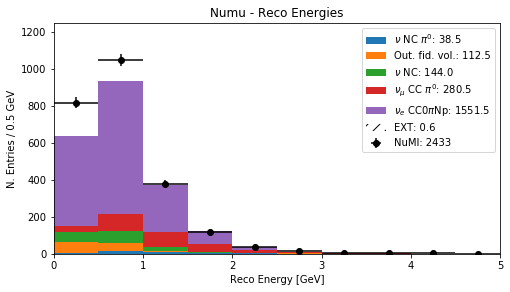

In [66]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    #2: r"$\nu_{\mu}$ CC",
    2: r"$\nu_e$ CC0$\pi$Np",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_vars_tot.values())

i = 0
for c in numu_mc_vars_tot.keys():
    numu_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot.values())

i = 0
for c in numu_mc_weights_tot.keys():
    numu_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot, numu_dirt_vars_tot]
weightss = [numu_mc_weights_tot, numu_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

n_ext, ext_bins, patches = numu_ax1.hist(
            numu_ext_vars_tot[str(0)][0],
            weights=numu_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot[str(0)].values())
print(type(numu_data_vars_tot[str(0)].values()))

numu_ax1.errorbar(
            current_bincenters,
            numu_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=numu_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0][-1])

numu_ax1.set_ylim([0, 1250])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [67]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


wanted_key = 3

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

#numu_wanted_list = n_numu_tot

[0.0, 0.0, 0.6476933933737996, 0.4327763890787537]

SUMS
[38.502059143300755, 151.0166954568138, 295.0388140587432, 575.5594870033412, 2127.0642897608413]
[112.51463631351305, 144.02211860192938, 280.52067294459806, 1551.5048027575]

Wanted List:
[489.9907571603991, 718.5202832733006, 254.59813590917292, 67.04399350464519, 15.892190431407016, 3.6195344151176414, 0.9271892951001064, 0.4799423792790094, 0.4327763890787537, 0.0]



Sidenote for unfolding

In [63]:
#Data values
data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = numu_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[ 820 1053  380  117   39   13    4    2    5    0]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[150.44297975 215.65001771 119.92778022  54.69033769  19.74380454
   8.26034846   3.90713154   1.70821789   0.74112804   0.48774117]


In [12]:
np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
           data_signal,
           delimiter =", ", 
           fmt ='% s')

## Ratio Plot


bin_ratios:
[0.021325349351619543, 0.04325312610617671, 0.04376572707781355, 0.040582579868631764, 0.06686569365257619, 0.0900723448475127, 0.14770598307274269, 0.16769301351764454, 0.04691411232177677, 0]


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [0.021325349351619543, 0.04325312610617671, 0.04376572707781355, 0.040582579868631764, 0.06686569365257619, 0.0900723448475127, 0.14770598307274269, 0.16769301351764454, 0.04691411232177677, 0]



Text(0.5, 1.0, 'Ratio')

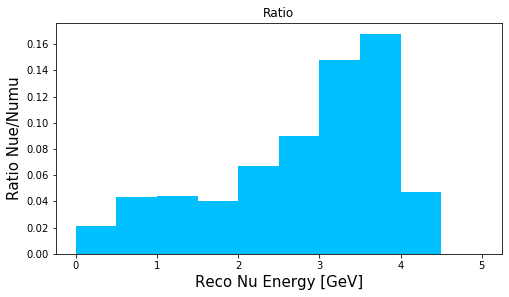

In [68]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('Reco Nu Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [69]:

nue_mc_stat_errs = np.array(nue_mc_stat_errs)
nue_nue_stat_errs = np.array(nue_nue_stat_errs)
nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)

numu_mc_stat_errs = np.array(numu_mc_stat_errs)
numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)


nue_detsys_errs = np.array(nue_detsys_errs)

### Expected Error Calculations

In [70]:
nue_exp_err    = np.sqrt(nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs)
totalstat_nue = nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs
#totalstat_nue = totalstat_nue
print("totalstat_nue ",totalstat_nue )
print("nue_exp_err ", nue_exp_err)
print("")

numu_exp_err    = np.sqrt(numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs)
totalstat_numu = numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs
print("totalstat_numu ",totalstat_numu )
print("numu_exp_err ", numu_exp_err)
print("")


nue_detsys_exp_err = np.sqrt(nue_detsys_errs)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("")

totalstat_nue  [3.38870401e-01 4.84245704e-01 1.48942643e-01 4.29389097e-02
 1.79338192e-02 3.25278482e-03 1.76781784e-03 9.19265275e-04
 1.41425427e-04 2.12138140e-04]
nue_exp_err  [0.58212576 0.69587765 0.38593088 0.20721706 0.13391721 0.05703319
 0.04204543 0.03031939 0.01189224 0.01456496]

totalstat_numu  [5.36854898e+01 7.90910898e+01 3.19840887e+01 1.01916835e+01
 3.00403399e+00 1.06240226e+00 4.02980169e-01 2.19807365e-01
 8.79229461e-02 3.66345609e-02]
numu_exp_err  [7.32703827 8.89331714 5.6554477  3.19244162 1.73321493 1.030729
 0.63480719 0.46883618 0.29651804 0.19140157]

totalstat_nue_detsys  [1.26199911e+01 1.55422624e+01 5.74589563e+00 1.02903073e+00
 1.92064884e-01 4.85613561e-02 4.52542464e-01 4.47406298e-03
 2.11206099e-03 5.65828354e-03]
nue_detsys_exp_err  [3.55246268 3.94236762 2.39705979 1.01441152 0.43825208 0.22036641
 0.67271276 0.06688844 0.04595716 0.07522156]



In [71]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])
#nue_cov           = np.zeros([6, 6])
#nue_cov_mc_stat   = np.zeros([6, 6])
#nue_cov_mc_detsys = np.zeros([6, 6])
#nue_cov_data_stat = np.zeros([6, 6])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(nue_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [72]:
nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_mc_stat_errs + nue_nue_stat_errs + nue_dirt_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs + nue_mc_stat_errs + numu_dirt_stat_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.diag(ratio_cov_mc_stat))

nue_cov_mc_stat =  [3.38870401e-01 4.84245704e-01 1.48942643e-01 4.29389097e-02
 1.79338192e-02 3.25278482e-03 1.76781784e-03 9.19265275e-04
 1.41425427e-04 2.12138140e-04]
numu_cov_mc_stat =  [5.36854898e+01 7.90910898e+01 3.19840887e+01 1.01916835e+01
 3.00403399e+00 1.06240226e+00 4.02980169e-01 2.19807365e-01
 8.79229461e-02 3.66345609e-02]
ratio_cov_mc_stat =  [7.79017775e-07 8.18093595e-07 1.95062455e-06 6.34016491e-06
 4.82321445e-05 2.19091509e-04 1.25851211e-03 3.09888880e-03
 8.95517670e-04 0.00000000e+00]


In [73]:
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))

nue_cov_mc_detsys =  [1.26199911e+01 1.55422624e+01 5.74589563e+00 1.02903073e+00
 1.92064884e-01 4.85613561e-02 4.52542464e-01 4.47406298e-03
 2.11206099e-03 5.65828354e-03]


### Now need the systematic errors

In [74]:
#nue_cov = (cov_nue_nue_ppfx[1:7, 1:7] + cov_nue_nue_genie[1:7, 1:7] + cov_nue_nue_reint[1:7, 1:7])
nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
nue_cov += (cov_nue_nue_geo)
nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
nue_cov += (cov_nue_mc_geo)

numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
numu_cov += (cov_numu_mc_geo)

Sidenote for Unfolding

In [75]:
print(nue_cov_mc_stat)

[[3.38870401e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.84245704e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.48942643e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.29389097e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.79338192e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.25278482e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e

In [71]:
#np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_StatOnly.csv", 
#           nue_cov_mc_stat,
#           delimiter =", ", 
#           fmt ='% s')

In [76]:
#print(cov_nue_nue_ppfx)

total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys

print(total_nue_cov)

[[1.86420151e+01 1.63942311e+01 5.98598777e+00 1.48137379e+00
  6.40120201e-01 2.06558134e-01 7.71722036e-02 3.21460126e-02
  5.71914585e-03 1.43988492e-03]
 [1.63942311e+01 7.21967065e+01 2.06400045e+01 5.01170221e+00
  2.44451491e+00 6.80328126e-01 2.27156951e-01 1.03310242e-01
  1.90948406e-02 7.34336010e-03]
 [5.98598777e+00 2.06400045e+01 1.39389942e+01 1.90636313e+00
  9.00751903e-01 2.47119930e-01 7.96680414e-02 3.59946299e-02
  6.75053839e-03 3.03558187e-03]
 [1.48137379e+00 5.01170221e+00 1.90636313e+00 1.60298300e+00
  2.19829472e-01 6.82485767e-02 2.23782993e-02 1.03872996e-02
  2.42281124e-03 7.24610128e-04]
 [6.40120201e-01 2.44451491e+00 9.00751903e-01 2.19829472e-01
  3.41813844e-01 3.25521829e-02 8.28023991e-03 4.64869230e-03
  6.31972346e-04 3.63302328e-04]
 [2.06558134e-01 6.80328126e-01 2.47119930e-01 6.82485767e-02
  3.25521829e-02 6.60023926e-02 3.97830297e-03 2.12463572e-03
  3.87111367e-04 3.00959912e-04]
 [7.71722036e-02 2.27156951e-01 7.96680414e-02 2.23782993e

1902

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


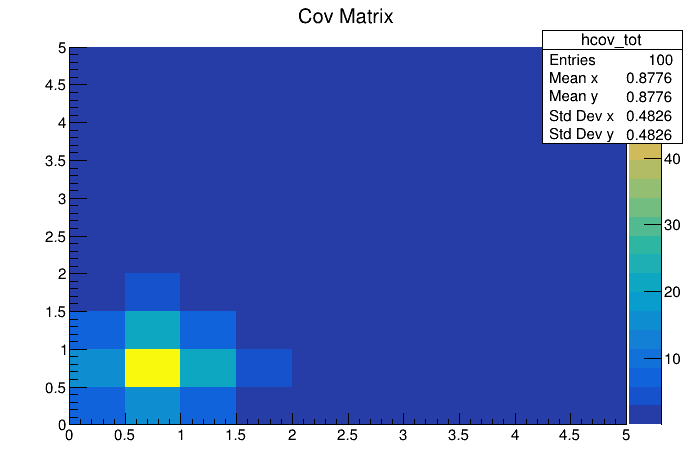

In [23]:
# Create a new canvas, and customize it.
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
#c1.SetFillColor( 42 )
#c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )

hfile = gROOT.FindObject( 'WSD_nue_energy_Flip.root' )
if hfile:
    hfile.Close()
hfile = TFile( 'WSD_nue_energy_Flip.root', 'UPDATE', 'Demo ROOT file with histograms' )

# Create some histograms, a profile histogram and an ntuple
#hpx    = TH1F( 'hpx', 'Prior Truth Input', 10, 0, 5 )
hpxpy  = TH2F( 'hcov_tot', 'Cov Matrix', 10, 0, 5, 10, 0, 5 )

# Set canvas/frame attributes.
hpxpy.SetFillColor( 48 )
gBenchmark.Start( 'hsimple' )
#gStyle.SetErrorX(0.0001)

#hpxpy.Fill(1, 2, 6)
for a in range(len(nue_exp_err)):
    for b in range(len(nue_exp_err)):
        hpxpy.Fill(a/2+0.25, b/2+0.25, total_nue_cov[a, b])
        #print(total_nue_cov[a, b])

hpxpy.Draw("COLZ")
hpxpy.SetFillColor( 0 )
c1.Modified()
c1.Update() 
#hpxpy.SetFillColor( 48 )
c1.Modified()
c1.Update()
c1.Draw()
hfile.Write()

In [66]:
print(total_nue_cov)

np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_truthseltest.csv", 
           total_nue_cov,
           delimiter =", ", 
           fmt ='% s')

#---------------------------------------------------------

[[4.68990694e+02 6.18323366e+02 2.42875512e+02 8.22700191e+01
  3.58265387e+01 1.33285692e+01 7.28590711e+00 5.10715171e+00
  2.08478639e+00 2.90707313e-01]
 [6.18323366e+02 8.28152599e+02 3.27983654e+02 1.11080819e+02
  4.78396312e+01 1.76294799e+01 9.89015814e+00 6.95936828e+00
  2.83163846e+00 4.12914191e-01]
 [2.42875512e+02 3.27983654e+02 1.35898702e+02 4.56152917e+01
  1.88128780e+01 6.77888726e+00 4.02200931e+00 2.99985612e+00
  1.22142477e+00 1.81878487e-01]
 [8.22700191e+01 1.11080819e+02 4.56152917e+01 1.60135854e+01
  6.80746358e+00 2.49992465e+00 1.44101436e+00 1.00950945e+00
  4.03813641e-01 6.02040790e-02]
 [3.58265387e+01 4.78396312e+01 1.88128780e+01 6.80746358e+00
  3.47181622e+00 1.30453662e+00 6.92349014e-01 4.28723295e-01
  1.53465637e-01 2.33152118e-02]
 [1.33285692e+01 1.76294799e+01 6.77888726e+00 2.49992465e+00
  1.30453662e+00 6.10132246e-01 3.05295071e-01 1.74184640e-01
  6.01639861e-02 8.39852480e-03]
 [7.28590711e+00 9.89015814e+00 4.02200931e+00 1.44101436e

In [19]:
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

In [20]:
print(type(total_numu_cov))

np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat.csv", 
           total_numu_cov,
           delimiter =", ", 
           fmt ='% s')

#---------------------------------------------------------

<class 'numpy.ndarray'>


End note

In [77]:
print(n_nue_tot)

[1.46352388e+01 3.73751080e+01 1.37277557e+01 3.68510836e+00
 1.45922934e+00 4.08662548e-01 2.09075728e-01 1.19576309e-01
 2.03033201e-02 2.89523075e-02]


In [89]:
#nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat)))
#add detsys fractional error in quadrature due to statistical fluctuations
frac_deysys_value = 0.1
frac_detsys_errors_nue = np.full((len(nue_exp_err)), frac_deysys_value)
print(frac_detsys_errors_nue)

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
nue_exp_err = nue_exp_err * (1 + frac_deysys_value)
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = nue_exp_err / n_nue_tot
nue_frac_err = np.sqrt(nue_frac_err**2 + frac_detsys_errors_nue**2)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot
print("")
print("numu_frac_err ", numu_frac_err)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

nue_exp_err  [2.69937938 8.27960611 3.14859482 0.83335601 0.42567152 0.14527097
 0.07509106 0.05120684 0.02492772 0.02157873]

nue_frac_err  [0.2098083  0.24305213 0.25021171 0.24726502 0.30837415 0.36927679
 0.37281888 0.43975653 1.23183148 0.75199845]

numu_exp_err  [114.74752121 168.26831182  71.488553    22.91277358   6.57050001
   2.71612136   1.16049821   0.70643329   0.48092324   0.49082246]

numu_frac_err  [0.17917157 0.18012595 0.19087745 0.18821949 0.18437818 0.228632
 0.24005403 0.32284349 0.40967836 1.00631746]


### Ratio Sys Errors

In [49]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_ppfx
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_ppfx_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_ppfx
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_ppfx_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_ppfx_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Numu
s_m = numu_mc_df_ppfx
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_ppfx_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()

n_test, bins = np.histogram(
            variable_nue, weights=spline_fix_var_nue, range=x_range, bins=n_bins)

##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0) and n_m[g] > 0:
                rratio = (n_n[g] + n_n_mc[g])/(n_m[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[ 1.66058163e-06 -3.66273141e-06 -6.86935589e-06 -1.01361081e-05
  -2.43042939e-05 -5.45037567e-05 -1.04421398e-04 -1.14205005e-04
  -2.79368177e-05  4.01992890e-05]
 [-3.66273141e-06  1.93214691e-05  3.16775912e-05  4.34617860e-05
   1.02148089e-04  2.30165829e-04  4.39706933e-04  4.84094613e-04
   1.19210970e-04 -1.66404841e-04]
 [-6.86935589e-06  3.16775912e-05  5.45448342e-05  7.50995177e-05
   1.76963803e-04  3.98176093e-04  7.62815741e-04  8.31986809e-04
   2.02505692e-04 -2.84558912e-04]
 [-1.01361081e-05  4.34617860e-05  7.50995177e-05  1.06695275e-04
   2.48181527e-04  5.60094072e-04  1.07288293e-03  1.17390233e-03
   2.86171929e-04 -4.10265721e-04]
 [-2.43042939e-05  1.02148089e-04  1.76963803e-04  2.48181527e-04
   5.88691201e-04  1.32152580e-03  2.52762053e-03  2.77049570e-03
   6.74021678e-04 -9.53698154e-04]
 [-5.45037567e-05  2.30165829e-04  3.98176093e-04  5.60094072e-04
   1.32152580e-03  2.99156541e-03  5.70870957e-03  6.26145399e-03
   1.5

In [50]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_genie
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_genie_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_genie
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_genie_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_genie_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Numu
s_m = numu_mc_df_genie
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_genie_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

        rbin_ratios_sys = []

        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0) and n_m[g] > 0:
                rratio = (n_n[g] + n_n_mc[g])/(n_m[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 1.22560602e-06  1.47182865e-06  2.74168151e-06  2.28614654e-06
  -1.16959518e-07 -2.84466248e-06 -6.39687933e-06 -1.00152198e-05
   3.14010631e-07  6.95669142e-06]
 [ 1.47182865e-06  5.03940632e-05  7.27596076e-05  8.32436136e-05
   2.21000815e-04  4.24525181e-04  7.08483347e-04  8.54354015e-04
   1.90991991e-04 -2.70647193e-04]
 [ 2.74168151e-06  7.27596076e-05  1.06023722e-04  1.20947262e-04
   3.16779309e-04  6.06397015e-04  1.01170789e-03  1.21808642e-03
   2.73802588e-04 -3.82518405e-04]
 [ 2.28614654e-06  8.32436136e-05  1.20947262e-04  1.40476313e-04
   3.70584056e-04  7.07625240e-04  1.18117987e-03  1.42474421e-03
   3.21995656e-04 -4.46681501e-04]
 [-1.16959518e-07  2.21000815e-04  3.16779309e-04  3.70584056e-04
   1.02317449e-03  1.97084778e-03  3.29810789e-03  3.99042745e-03
   8.79205186e-04 -1.28052601e-03]
 [-2.84466248e-06  4.24525181e-04  6.06397015e-04  7.07625240e-04
   1.97084778e-03  3.82295648e-03  6.40669547e-03  7.74886022e-03
   1.6

In [51]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_reint
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_reint_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_reint
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_reint_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_reint_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Numu
s_m = numu_mc_df_reint
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_reint_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
if (not df_n.empty) and (not df_m.empty):
    for i in range(Nuniverse):
        weight_n = df_n[i].values / 1000.
        weight_n[np.isnan(weight_n)] = 1
        weight_n[weight_n > 100] = 1
        weight_n[weight_n < 0] = 1
        weight_n[weight_n == np.inf] = 1
        weight_n_mc = df_n_mc[i].values / 1000.
        weight_n_mc[np.isnan(weight_n_mc)] = 1
        weight_n_mc[weight_n_mc > 100] = 1
        weight_n_mc[weight_n_mc < 0] = 1
        weight_n_mc[weight_n_mc == np.inf] = 1
        weight_m = df_m[i].values / 1000.
        weight_m[np.isnan(weight_m)] = 1
        weight_m[weight_m > 100] = 1
        weight_m[weight_m < 0] = 1
        weight_m[weight_m == np.inf] = 1
        n_n, bins = np.histogram(
            variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
        n_n_mc, bins = np.histogram(
            variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
        n_m, bins = np.histogram(
            variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

        rbin_ratios_sys = []


        for g in range(len(n_n)):
            if (n_n[g] > 0 or n_n_mc[g] > 0) and n_m[g] > 0:
                rratio = (n_n[g] + n_n_mc[g])/(n_m[g])
                rbin_ratios_sys.append(rratio)
            else:
                rbin_ratios_sys.append(0)
                        
        n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 1.39486196e-06 -3.97874402e-06 -7.88084259e-06 -1.20637934e-05
  -2.68401576e-05 -6.62004517e-05 -1.19863592e-04 -1.39198138e-04
  -3.26474400e-05  4.53694437e-05]
 [-3.97874402e-06  1.24387233e-05  2.39741611e-05  3.62955845e-05
   8.12975300e-05  1.99723874e-04  3.63142994e-04  4.21971777e-04
   1.00264484e-04 -1.36018251e-04]
 [-7.88084259e-06  2.39741611e-05  4.66250967e-05  7.08375050e-05
   1.58250108e-04  3.88860795e-04  7.06559825e-04  8.21278253e-04
   1.94736152e-04 -2.65744047e-04]
 [-1.20637934e-05  3.62955845e-05  7.08375050e-05  1.07834205e-04
   2.40611125e-04  5.91206787e-04  1.07380281e-03  1.24842877e-03
   2.95768861e-04 -4.04680236e-04]
 [-2.68401576e-05  8.12975300e-05  1.58250108e-04  2.40611125e-04
   5.37444376e-04  1.32106719e-03  2.39935290e-03  2.78864881e-03
   6.60421112e-04 -9.02788264e-04]
 [-6.62004517e-05  1.99723874e-04  3.88860795e-04  5.91206787e-04
   1.32106719e-03  3.25115068e-03  5.90080973e-03  6.85438744e-03
   1.6

In [52]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 10
x_range = (0.0, 5.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

##Nue
s_n = nue_nue_df_geo
df_n = pd.DataFrame(s_n.values.tolist())

variable_nue = nue_nue_df_geo_vars.squeeze()
spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
spline_fix_var_nue = spline_fix_var_nue.squeeze()

##Nue_Mc

s_n_mc = nue_mc_df_geo
df_n_mc = pd.DataFrame(s_n_mc.values.tolist())

variable_nue_mc = nue_mc_df_geo_vars.squeeze()
spline_fix_var_nue_mc = pd.DataFrame(nue_mc_df_geo_splines)
spline_fix_var_nue_mc = spline_fix_var_nue_mc.squeeze()

##Numu
s_m = numu_mc_df_geo
df_m = pd.DataFrame(s_m.values.tolist())

variable_numu = numu_mc_df_geo_vars.squeeze()
spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
spline_fix_var_numu = spline_fix_var_numu.squeeze()


##Ratio
print("Number of variations Universes",10)
for variationNumber in [x*2 for x in range(10)]:
    n_tot = np.empty([2, n_bins])
    n_tot.fill(0.)
    if (not df_n.empty) and (not df_m.empty):
        for i in range(2):
            weight_n = df_n[i+variationNumber].values
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_n_mc = df_n_mc[i+variationNumber].values
            weight_n_mc[np.isnan(weight_n_mc)] = 1
            weight_n_mc[weight_n_mc > 100] = 1
            weight_n_mc[weight_n_mc < 0] = 1
            weight_n_mc[weight_n_mc == np.inf] = 1
            weight_m = df_m[i+variationNumber].values
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_n_mc, bins = np.histogram(
                variable_nue_mc, weights=weight_n_mc*spline_fix_var_nue_mc, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if (n_n[g] > 0 or n_n_mc[g] > 0) and n_m[g] > 0:
                    rratio = (n_n[g] + n_n_mc[g])/(n_m[g])
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0:
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 1.29780689e-05 -4.10417596e-05 -8.48458959e-05 -1.20939397e-04
  -2.62824413e-04 -6.49273144e-04 -1.17809506e-03 -1.36862003e-03
  -3.38683227e-04  4.95310218e-04]
 [-4.10417596e-05  1.32093154e-04  2.71618000e-04  3.86469874e-04
   8.39864739e-04  2.07454420e-03  3.76404161e-03  4.37402890e-03
   1.08398609e-03 -1.57621266e-03]
 [-8.48458959e-05  2.71618000e-04  5.60009966e-04  7.97076659e-04
   1.73219924e-03  4.27760790e-03  7.76031562e-03  9.01744591e-03
   2.23334620e-03 -3.25396480e-03]
 [-1.20939397e-04  3.86469874e-04  7.97076659e-04  1.13528517e-03
   2.46664536e-03  6.09070741e-03  1.10494867e-02  1.28394291e-02
   3.17972795e-03 -4.63343282e-03]
 [-2.62824413e-04  8.39864739e-04  1.73219924e-03  2.46664536e-03
   5.36153688e-03  1.32377576e-02  2.40147502e-02  2.79035509e-02
   6.90845452e-03 -1.00712835e-02]
 [-6.49273144e-04  2.07454420e-03  4.27760790e-03  6.09070741e-03
   1.32377576e-02  3.26953694e-02  5.9

In [53]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 1.72591185e-05 -4.72114063e-05 -9.68544129e-05 -1.40853152e-04
  -3.14085824e-04 -7.72822015e-04 -1.40877693e-03 -1.63203840e-03
  -3.98953474e-04  5.87835642e-04]
 [-4.72114063e-05  2.14247410e-04  4.00029360e-04  5.49470858e-04
   1.24431117e-03  2.92895908e-03  5.27537489e-03  6.13444931e-03
   1.49445353e-03 -2.14928295e-03]
 [-9.68544129e-05  4.00029360e-04  7.67203618e-04  1.06396094e-03
   2.38419246e-03  5.67104181e-03  1.02413991e-02  1.18887974e-02
   2.90439063e-03 -4.18678617e-03]
 [-1.40853152e-04  5.49470858e-04  1.06396094e-03  1.49029096e-03
   3.32602207e-03  7.94963351e-03  1.43773523e-02  1.66865044e-02
   4.08366440e-03 -5.89506028e-03]
 [-3.14085824e-04  1.24431117e-03  2.38419246e-03  3.32602207e-03
   7.51084695e-03  1.78511984e-02  3.22398316e-02  3.74531228e-02
   9.12210250e-03 -1.32082959e-02]
 [-7.72822015e-04  2.92895908e-03  5.67104181e-03  7.94963351e-03
   1.78511984e-02  4.27610420e-02  7.73345024e-02  8.97875969e-02
   2.19092314e-02 -3.17895633e-02

In [54]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.diag(ratio_cov_mc_stat))
print("")
print("np.diag ", np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))
print("")
print("ratio_exp_err ", ratio_exp_err)

ratio_cov  [1.72591185e-05 2.14247410e-04 7.67203618e-04 1.49029096e-03
 7.51084695e-03 4.27610420e-02 1.40046039e-01 1.88819258e-01
 1.14362366e-02 2.42371631e-02]

ratio_cov_mc_stat  [7.79017775e-07 8.18093595e-07 1.95062455e-06 6.34016491e-06
 4.82321445e-05 2.19091509e-04 1.25851211e-03 3.09888880e-03
 8.95517670e-04 0.00000000e+00]

np.diag  [1.80381362e-05 2.15065504e-04 7.69154243e-04 1.49663113e-03
 7.55907909e-03 4.29801335e-02 1.41304551e-01 1.91918147e-01
 1.23317543e-02 2.42371631e-02]

ratio_exp_err  [0.00424713 0.01466511 0.02773363 0.03868632 0.08694296 0.20731651
 0.37590498 0.43808463 0.11104843 0.15568289]


/tmp/ipykernel_16928/1724554142.py:12: RuntimeWarning: divide by zero encountered in true_divide
  numu_stat_weights = np.sqrt(np.diag(numu_cov_mc_stat))/numu_wanted_list
/tmp/ipykernel_16928/1724554142.py:13: RuntimeWarning: divide by zero encountered in true_divide
  numu_sys_weights = np.sqrt(np.diag(numu_cov))/numu_wanted_list
/tmp/ipykernel_16928/1724554142.py:14: RuntimeWarning: invalid value encountered in true_divide
  ratio_stat_weights = np.sqrt(np.diag(ratio_cov_mc_stat))/rbin_ratios
/tmp/ipykernel_16928/1724554142.py:15: RuntimeWarning: divide by zero encountered in true_divide
  ratio_sys_weights = np.sqrt(np.diag(ratio_cov))/rbin_ratios


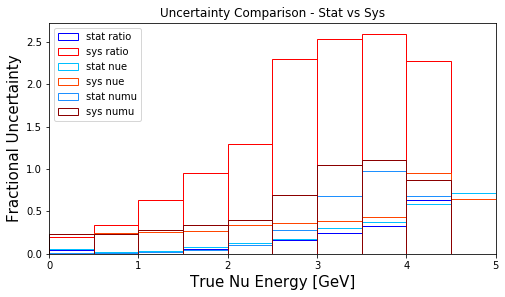

In [35]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]


nue_stat_weights = np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list
nue_sys_weights = np.sqrt(np.diag(nue_cov))/nue_wanted_list
numu_stat_weights = np.sqrt(np.diag(numu_cov_mc_stat))/numu_wanted_list
numu_sys_weights = np.sqrt(np.diag(numu_cov))/numu_wanted_list
ratio_stat_weights = np.sqrt(np.diag(ratio_cov_mc_stat))/rbin_ratios
ratio_sys_weights = np.sqrt(np.diag(ratio_cov))/rbin_ratios


sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Stat vs Sys")
errors_r_ax1.set_xlim([0, 5])
#errors_r_ax1.set_ylim([0, 100])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [36]:
#errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_recoE_fraclog_consistent.pdf")

In [37]:
ratio_bins = np.arange(0, 5.5, 0.5)
ratio_bincenters = np.arange(0.25, 5.25, 0.5)
ratio_bin_edges = np.arange(0, 5.5, 0.5)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(ratio_exp_err)
print("")
ratio_frac_err = ratio_exp_err / ratio_n_tot
print(ratio_frac_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(ratio_n_tot-ratio_exp_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 2])

[0.021325349351619543, 0.04325312610617671, 0.04376572707781355, 0.040582579868631764, 0.06686569365257619, 0.0900723448475127, 0.14770598307274269, 0.16769301351764454, 0.04691411232177677, 0]

error
[0.00424713 0.01466511 0.02773363 0.03868632 0.08694296 0.20731651
 0.37590498 0.43808463 0.11104843 0.15568289]

[0.19915888 0.33905322 0.63368375 0.95327397 1.30026266 2.30166658
 2.5449543  2.61242031 2.36705816        inf]


/tmp/ipykernel_16928/107676633.py:13: RuntimeWarning: divide by zero encountered in true_divide
  ratio_frac_err = ratio_exp_err / ratio_n_tot


(0, 2)

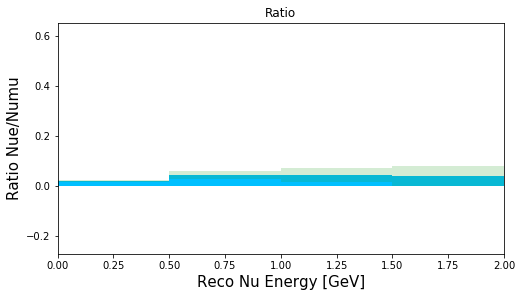

In [38]:
ratio_fig


In [39]:
ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_recoE.pdf")

In [90]:
nue_bin_edges = np.arange(0, 5.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

#nue_frac_err = nue_exp_err / n_nue_tot
print(nue_frac_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.2098083  0.24305213 0.25021171 0.24726502 0.30837415 0.36927679
 0.37281888 0.43975653 1.23183148 0.75199845]


<BarContainer object of 10 artists>

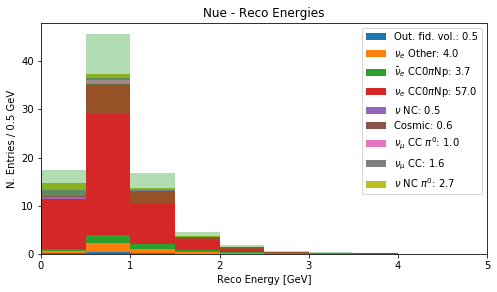

In [91]:
nue_fig

In [56]:
nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE.pdf")

In [42]:
numu_bin_edges = np.arange(0, 5.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot
print(numu_frac_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot-numu_exp_err))

[0.17917157 0.18012595 0.19087745 0.18821949 0.18437818 0.228632
 0.24005403 0.32284349 0.40967836 1.00631746]


<BarContainer object of 10 artists>

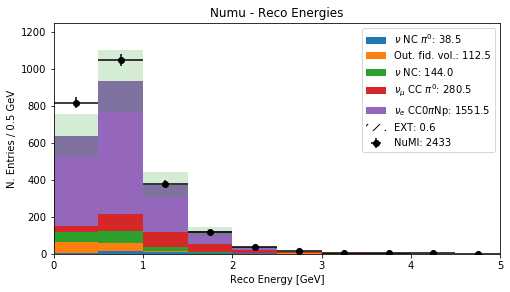

In [43]:
numu_fig

In [44]:
numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE.pdf")

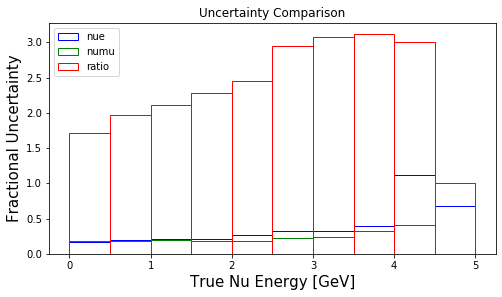

In [165]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

In [64]:
errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_recoE.pdf")